In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt

import visa
from importlib import reload
from pytopo.mplplots.init_nb_plotting import *

In [2]:
rm = visa.ResourceManager()
rm.list_resources()

('TCPIP0::169.254.2.20::inst0::INSTR',
 'TCPIP0::169.254.234.107::inst0::INSTR',
 'ASRL1::INSTR',
 'ASRL3::INSTR',
 'ASRL5::INSTR',
 'GPIB0::3::INSTR',
 'GPIB0::10::INSTR')

In [3]:
sr760 = rm.open_resource('GPIB0::10::INSTR')
# sr760.query(r"*IDN?\n")

In [4]:
sr760.timeout = 30000

In [170]:
sr760.write(r"SPAN 11\n")
sr760.write(r"MEAS 1,0\n")
sr760.write(r"DISP 1,0\n")
sr760.write(r"UNIT 1,1\n")
sr760.write(r"VOEU 1,0\n")
sr760.write(r"STRF 5\n")

fvals = []
for i in range(400):
    fvals.append(float(sr760.query(r"BVAL? 1,{:d}\n".format(i).strip())))
fvals = np.array(fvals)

In [183]:
sr760.write(r"ARNG 1")

data = sr760.query(r"SPEC? 1\n").strip()
data = np.array([float(d) for d in data.split(',')[:-1]])

<IPython.core.display.Javascript object>


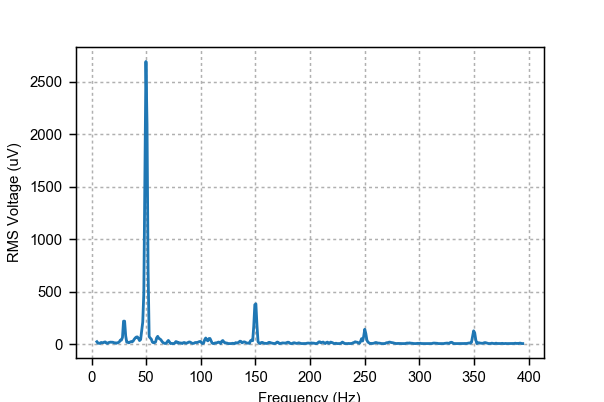

In [184]:
fig, ax = plt.subplots(1,1)
ax.plot(fvals, data * 1e6)

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('RMS Voltage (uV)')
ax.grid(dashes=[2,2])
# ax.set_xlim([20, 40])
# ax.set_ylim([0, 100])